# Prediciton of OUTCOME with COVID-19 data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import os

In [2]:
os.chdir("..")

In [511]:
df = pd.read_csv("./data/data.csv")

In [512]:
df.head(3)

,CATEGORY,ESTATUS_HOSPITALIZADO,ESTATUS,OUTCOME,GENERO,FECHA_INGRESO,MES,weeks,SEMANA_EPIDEMIOLOGICA,FECHA_EGRESO,...,CtORF,VARIANTE,GRUPO_VARIANTE,SANGER,Mutaciones_qPCR,GENOMA_COMPLETO,CLAVE,TIPO_COMPLICACION_TROMBOCITCA,INSUFICIENCIA_RENAL_AGUDA,TERAPIA_REEMPLAZO_RENAL
0,patient,4.00,ambulatorio,0.00,1,06/08/2021,agosto,august_1,NaN,NaN,...,NaN,4.00,delta,NaN,NaN,1,CoV-Cardio-1-026,NaN,NaN,NaN
1,patient,3.00,defuncion,1.00,2,06/06/2021,junio,june_1,22.00,24/06/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
2,patient,3.00,defuncion,1.00,2,28/03/2021,marzo,march_2,13.00,04/05/2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
## fixing column names  
fixed_col=[col.replace(" ", "") for col in list(df.columns)]

In [514]:
df.columns=fixed_col

In [1289]:
###selection of columns for the model 
cols=['GENERO','ESQUEMA_COMPLETO','FIEBRE','TOS','DIARREA','OUTCOME',
    'MIALGIAS','ARTRALGIAS','CEFALEA','CONGESTION_NASAL', 'FARINGODINIA','ANOSMIA','CLASSIFICATION',
'EDAD','IMC','TABAQUISMO','DIABETES' ,'HAS','EPOC','COMORBILIDADES',
'LEUCOCITOS' ,'NEUTROFILOS'	,'LINFOCITOS' ,'MONOCITOS','HEMOGLOBINA','HTO','PLAQUETAS','APACHEII','TIEMPO_BUSQUEDA_ATENCION',
'TEMPERATURA'	,'TA_SISTOLICA',	'TA_DIASTOLICA'	,'FREQ_RESPIRATORIA',	'FREQ_CARDIACA'	,'GLASGOW', 	
'pH' ,'pCO2',	'pO2'	,'SATURACION',	'FIO2'	,'PAFI'	,'Formula_PAFI'	,'LACTATO',
'CREATININA',	'Na'	,'K',	'ALBUMINA',	'BILIRRUBINA_TOTAL','BILIRRUBINA_DIRECTA'	,'BILIRRUBINA_INDIRECTA' ,
'TGO',	'TGP',	'LDH'	,'CPK'	,'DD',	'PCR'	,'PCT',	'FERRITINA','SOFA'

]

In [1183]:
df_2=df[cols]

In [1184]:
df_2.tail(10)

,GENERO,ESQUEMA_COMPLETO,FIEBRE,TOS,DIARREA,OUTCOME,MIALGIAS,ARTRALGIAS,CEFALEA,CONGESTION_NASAL,...,BILIRRUBINA_INDIRECTA,TGO,TGP,LDH,CPK,DD,PCR,PCT,FERRITINA,SOFA
1008,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.39,22.00,18.00,381.00,44.00,0.18,20.71,0.14,610.90,4.00
1009,1,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,...,0.17,38.00,23.00,323.00,117.00,0.52,6.98,0.03,206.29,2.00
1010,2,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.47,47.00,45.00,457.00,81.00,0.23,24.73,0.11,2270.21,4.00
1011,2,2.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,...,0.36,53.00,38.00,826.00,159.00,0.46,9.69,0.56,3663.50,4.00
1012,1,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.32,38.00,40.00,382.00,20.00,0.32,17.93,0.10,670.83,2.00
1013,2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,1,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,...,0.17,120.00,74.00,1051.00,70.00,78.22,11.75,0.04,1442.29,5.00
1015,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.26,21.00,13.00,302.00,34.00,0.80,21.21,0.35,NaN,3.00
1017,1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,0.41,60.00,47.00,619.00,132.00,0.65,5.70,0.06,1999.18,3.00


In [1185]:
df_2.CLASSIFICATION.value_counts()

critic    568
severe    323
mild      124
Name: CLASSIFICATION, dtype: int64

In [1186]:
## mild category  has a lot of  missing values in all the columns 
df_2[df_2['CLASSIFICATION']=='mild'].isnull().sum().to_frame().sort_values(by=[0],ascending=False).head(10)

,0
TEMPERATURA,124
Na,124
FREQ_RESPIRATORIA,124
FREQ_CARDIACA,124
GLASGOW,124
pH,124
pCO2,124
pO2,124
SATURACION,124
FIO2,124


In [1187]:
###removing mild
df_3=df_2[df_2['CLASSIFICATION']!='mild']

In [1188]:
df_3["CLASSIFICATION"]=df_3["CLASSIFICATION"].replace(to_replace=['critic', 'severe'],value=[0,1])

In [1189]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
GENERO,894.00,1.63,0.48,1.00,1.00,2.00,2.00,2.00
ESQUEMA_COMPLETO,857.00,0.54,0.82,0.00,0.00,0.00,1.00,2.00
FIEBRE,891.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
TOS,891.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
DIARREA,891.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
OUTCOME,890.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00
MIALGIAS,891.00,0.66,0.48,0.00,0.00,1.00,1.00,1.00
ARTRALGIAS,891.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00
CEFALEA,891.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
CONGESTION_NASAL,891.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00


## Imputation of missing values in categorcical data

In [1190]:
###list for numerical and categorical variables 
numerical=[]
others=[]
for col in df_3.columns:
    if df_3[col].dtypes == "float64" or df_3[col].dtypes == "int":
        if len(df_3[col].unique()) > 6:
            numerical.append(col)
        else:
            others.append(col)


In [1192]:
##with categorical data we will use the mode for imputation
for i in others:
    df_3[i].fillna(value=df_3[i].mode()[0], inplace=True)

### Imputation of missing values in numerical data using IterativeImputer

In [1193]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [1194]:
imp = IterativeImputer(initial_strategy="mean", imputation_order="ascending", min_value=0)

In [1195]:
df_3_impu= df_3.copy(deep = True) 

df_3_impu.iloc[:, :] = imp.fit_transform(df_3_impu)

In [1197]:
df_3_impu.describe().T

,count,mean,std,min,25%,50%,75%,max
GENERO,894.00,1.63,0.48,1.00,1.00,2.00,2.00,2.00
ESQUEMA_COMPLETO,894.00,0.52,0.81,0.00,0.00,0.00,1.00,2.00
FIEBRE,894.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
TOS,894.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
DIARREA,894.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
OUTCOME,894.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00
MIALGIAS,894.00,0.66,0.48,0.00,0.00,1.00,1.00,1.00
ARTRALGIAS,894.00,0.27,0.45,0.00,0.00,0.00,1.00,1.00
CEFALEA,894.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
CONGESTION_NASAL,894.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00


# Correlation matrix 

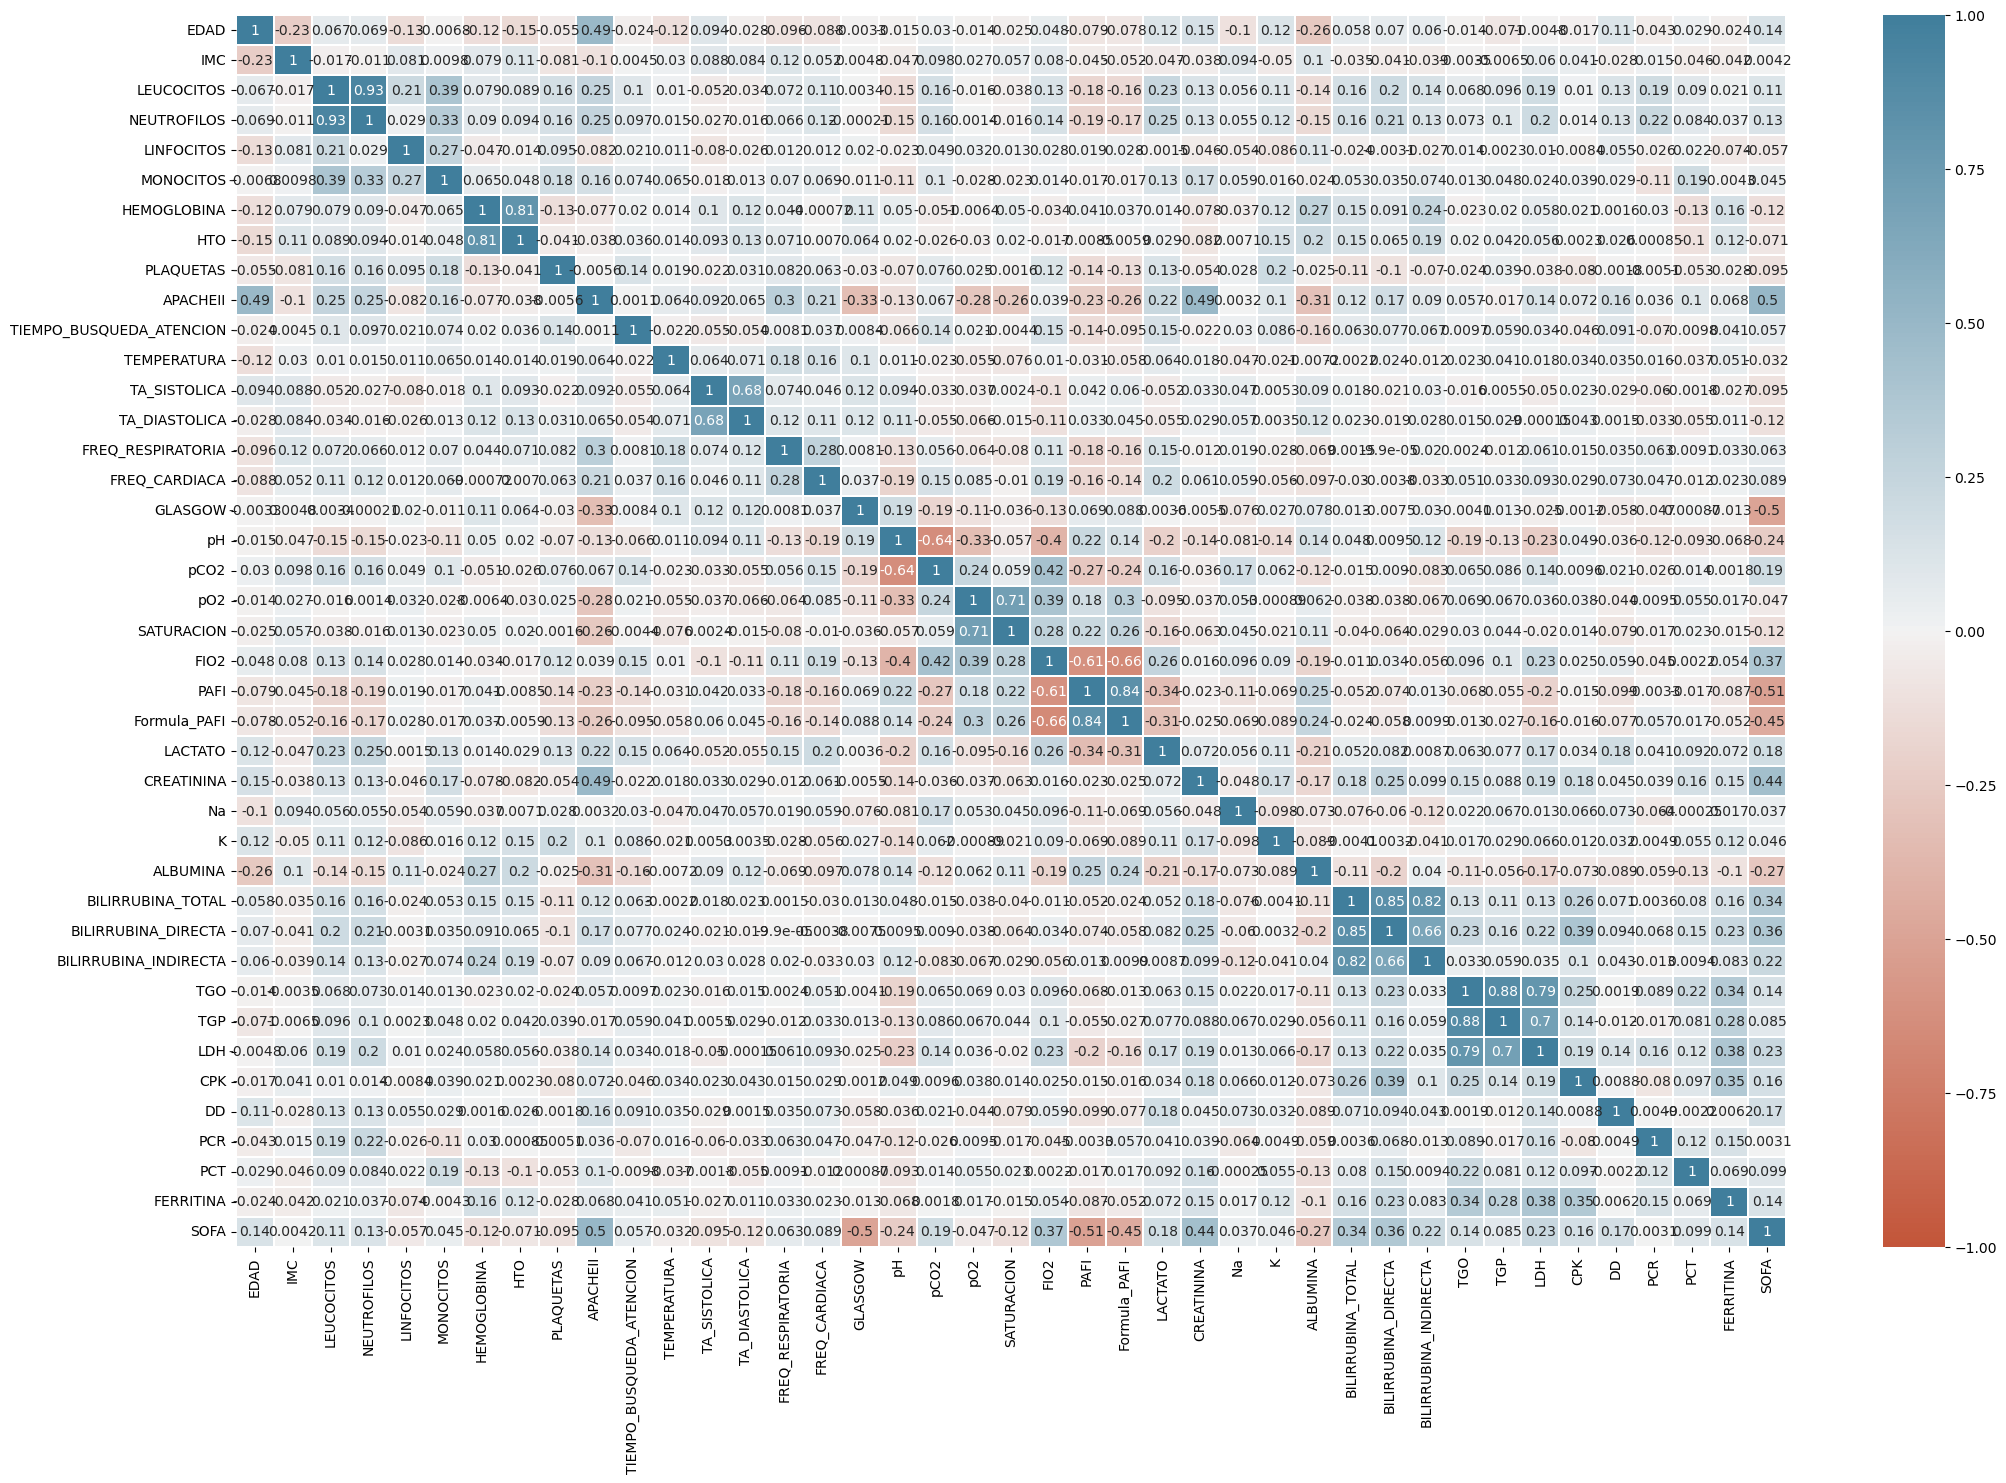

In [1230]:
fig = plt.figure(figsize = (25,16))
sns.heatmap(
    data=df_3_impu[numerical].corr(numeric_only=True),
    cmap= sns.diverging_palette(20,230, as_cmap=True), 
    center=0,
    vmin=-1, 
    vmax=1,
    linewidths=0.1, 
    annot=True)
plt.show()

## Undersampling unbalanced target for classification

In [1231]:
from imblearn.under_sampling import RandomUnderSampler

In [1232]:
undersample = RandomUnderSampler(random_state=42)

In [1261]:
X= df_3_impu.drop(columns='OUTCOME')
y = df_3_impu['OUTCOME']

In [1262]:
X_over , y_over = undersample.fit_resample(X,y)

<Axes: xlabel='OUTCOME', ylabel='count'>

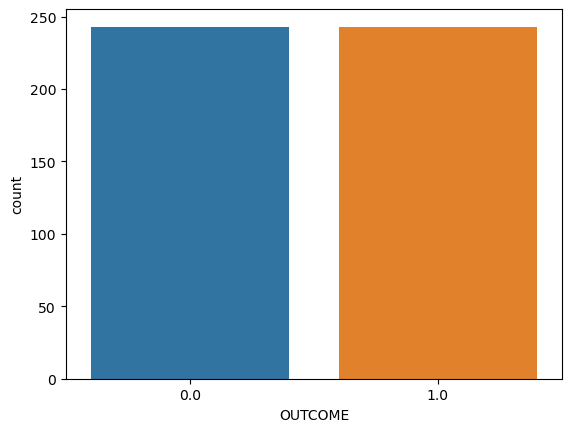

In [1263]:
sns.countplot(x=y_over)

## split Data, Transformation of target and sacling X

In [1264]:
from sklearn.preprocessing import StandardScaler, LabelEncoder ,PowerTransformer,RobustScaler
from sklearn.model_selection import train_test_split  

In [1265]:
LabEn=LabelEncoder()
LabEn.fit([0, 1])
y_over=LabEn.transform(y_over)

In [1266]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, random_state=42,test_size=.30)  
Scaler= StandardScaler().fit(X_train)    

X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

# Models

## Random Forest model

In [1267]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

In [1268]:
rf=RandomForestClassifier()

In [1269]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1270]:
y_preditc=rf.predict(X_test)

In [1271]:
print(f"accuracy score:{accuracy_score(y_test,rf.predict(X_test))}")
print(f"f1_score:{f1_score(y_test,rf.predict(X_test))}") 
print("confusion matrix")
print(confusion_matrix(y_test,rf.predict(X_test)))

accuracy score:0.6575342465753424
f1_score:0.6376811594202899
confusion matrix
[[52 21]
 [29 44]]


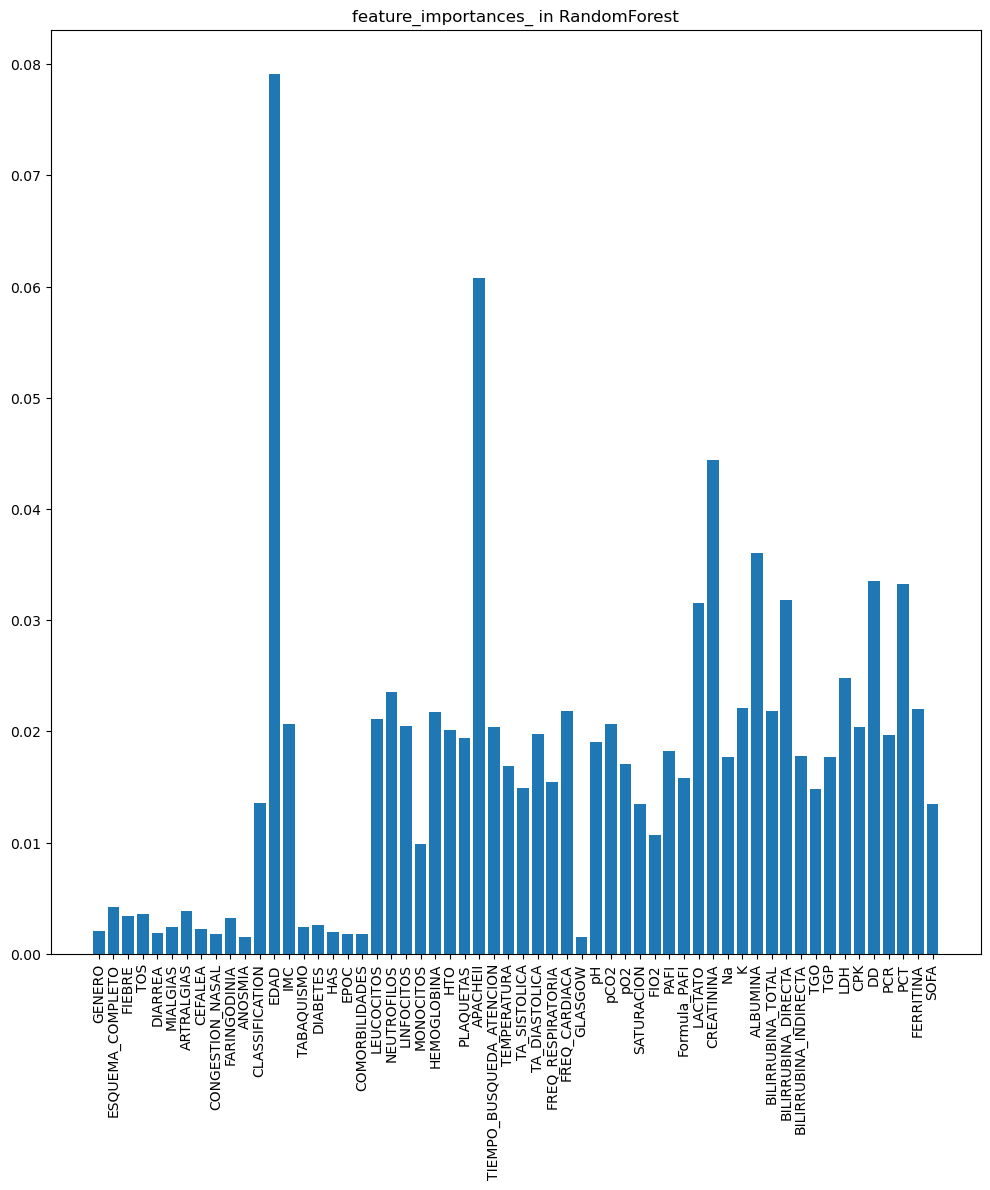

In [1292]:
plt.figure(figsize=(12,12))
plt.bar(height=rf.feature_importances_,x=X.columns )
plt.title("feature_importances_ in RandomForest")
plt.xticks(rotation=90)
plt.show()

## LGBM model 

In [1273]:
from lightgbm import LGBMClassifier

In [1274]:

model=LGBMClassifier()

In [ ]:
model.fit(X_train,y_train)

In [1276]:
print(f"accuracy score:{accuracy_score(y_test,model.predict(X_test))}")
print(f"f1_score:{f1_score(y_test,model.predict(X_test))}") 
print("confusion matrix")
print(confusion_matrix(y_test,model.predict(X_test)))

accuracy score:0.678082191780822
f1_score:0.6713286713286712
confusion matrix
[[51 22]
 [25 48]]


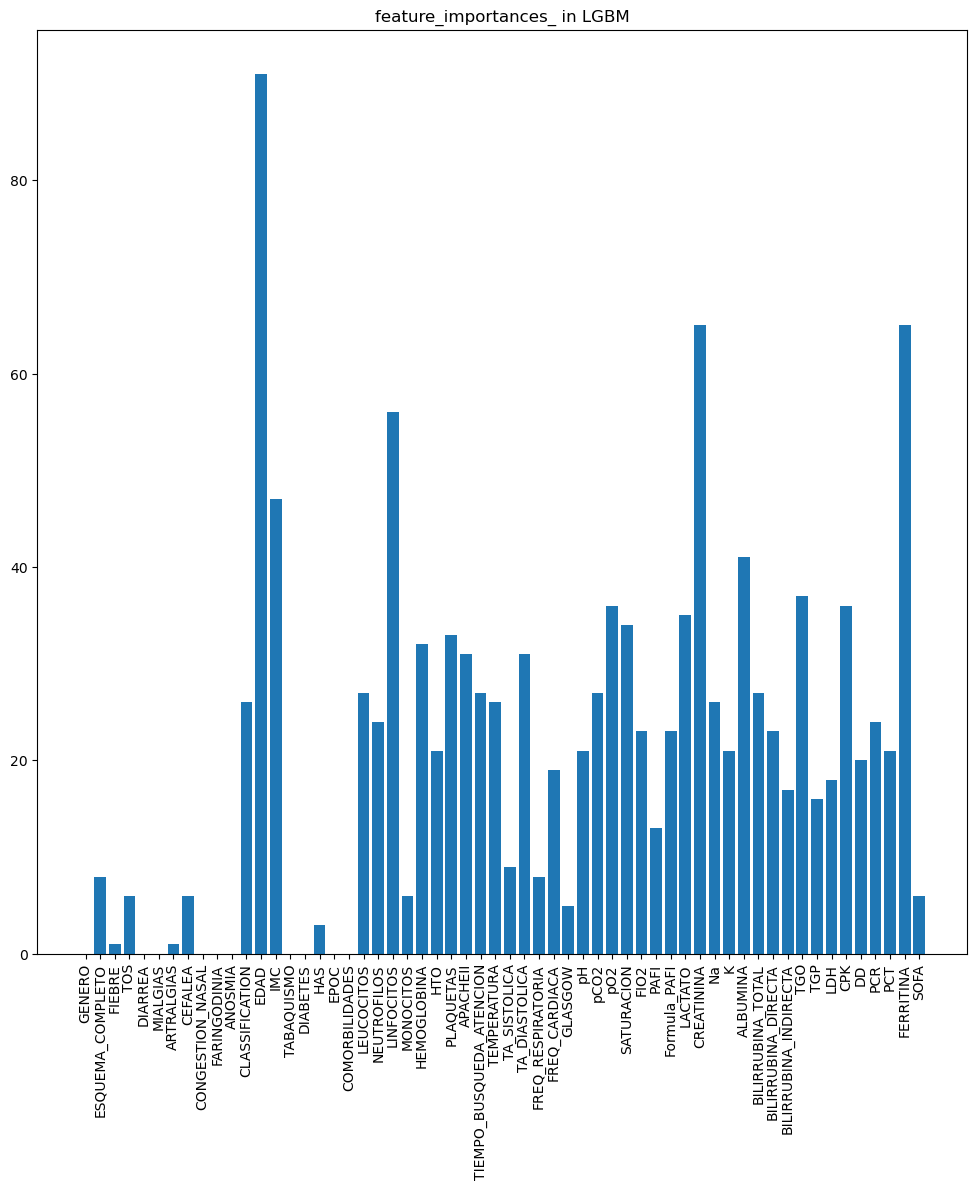

In [1293]:
plt.figure(figsize=(12,12))
plt.bar(height=model.feature_importances_,x=X.columns )
plt.xticks(rotation=90)
plt.title("feature_importances_ in LGBM")
plt.show()

## Nearested Centroid model 

In [1278]:
from sklearn.neighbors import NearestCentroid 
from sklearn.model_selection import GridSearchCV

In [1279]:
nc=NearestCentroid(metric='euclidean',shrink_threshold=.3)

In [1280]:
nc.fit(X_test,y_test)

NearestCentroid(shrink_threshold=0.3)

## Metrics

In [1281]:
print(f"accuracy score:{accuracy_score(y_test,nc.predict(X_test))}")
print(f"f1_score:{f1_score(y_test,nc.predict(X_test))}") 
print(f"ROC_AUC:{roc_auc_score(y_test,nc.predict(X_test))}") 
print("confusion matrix")
print(confusion_matrix(y_test,nc.predict(X_test)))

accuracy score:0.7465753424657534
f1_score:0.7218045112781954
ROC_AUC:0.7465753424657534
confusion matrix
[[61 12]
 [25 48]]


# Cross Validation

In [1282]:
from sklearn.model_selection import cross_validate

In [1283]:
X_valid=Scaler.transform(X_over)

In [1284]:
final_result = cross_validate(nc, X_valid, y_over, return_train_score=True, cv=3)

In [1285]:
print(f" mean train score:{np.mean(final_result['train_score'])}")
print(f" mean test score:{np.mean(final_result['test_score'])}")

 mean train score:0.7314814814814815
 mean test score:0.7037037037037037


In [1286]:
from sklearn.model_selection import KFold, cross_val_score

In [1287]:
k_folds = KFold(n_splits = 8)

scores = cross_val_score(nc, X_valid, y_over, cv = k_folds)

In [1288]:
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Average CV Score:  0.7094262295081967
Number of CV Scores used in Average:  8


# Concslusion 


- Although the  Nearested Centroid is a relatively simple model, it is very powerful
- In the case of this data it was the one that gave us the best results, as we can see in all the metrics evaluated.
- Also,  age, BMI and creatinine are very important features according to Randome Forest and LGBM  model 
   